機器學習其實基本上和我們一直以來說的一樣, 就是我們要學一個未知的函數

$$f(x) = y$$

如果是分類, 基本上就是有一筆資料 $x=(x_1, x_2, \ldots, x_k)$, 我們想知道這

$$f(x) = y$$,

其中的 $y$ 就是某一個類別。

這種學函數的方法, 又可以分為:

* supervised learning
* unsupervised learning 

其中的 supervised learning 就是我們有一組知道答案的訓練資料, 然後找到我們要的函數。而 unsupervised learning 就神了, 我們不知道答案, 卻要電腦自己去學!

今天我們就來介紹最最基本的方式, 一個是 SVM, 一個是 K-Means。

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. 學得「太像」不一定好

很久很久以前, 有個中學的數學老師每天放學前會在黑板上畫出幾個點、寫出座標。同學回家用各種方法找函數, 如果這個函數碰到的點越多就越高分! 這樣讓同學對函數產生興趣...

我們用電腦模擬這個場景, 就取 6 個點好了。

In [3]:
X = np.random.rand(6)
Y = np.random.rand(6)

畫出來是這樣, 我們特意把點放大。

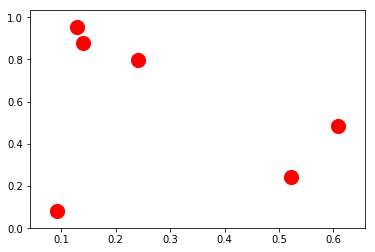

In [4]:
plt.scatter(X,Y,s=200,c='r')

同學大概就是回去翻書啦、試驗啦找函數。比方說有位同學想到用

$$f(x) = x^2$$

In [5]:
x = np.linspace(0,1,1000)

In [6]:
y = x**2

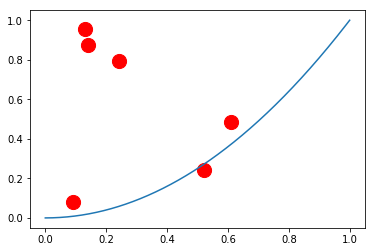

In [7]:
plt.scatter(X,Y,s=200,c='r')
plt.plot(x,y)

勉強削到一個點, 老師可能也給他 1 分。

這樣的問題同學也覺得好玩, 老師也很得意, 直到有一天有位同學想到 $\sin(x)$ 系的函數...

In [9]:
def draw(n=1):
    y = 0.5*np.sin(n*x) + 0.5
    plt.plot(x, y)
    plt.scatter(X, Y, c='r', s=200)

會像這樣。

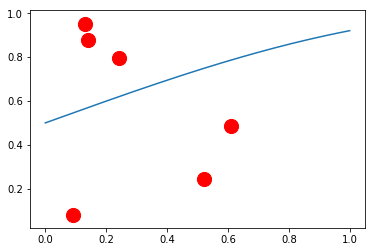

In [10]:
draw(1)

這看來很遜, 但同學聰明的把 $n$ 越弄越大...

In [11]:
from ipywidgets import interact

In [12]:
interact(draw, n=(1,500))

A Jupyter Widget

<function __main__.draw>

你會發現早晚所有的點會碰到!! 如果這化成資料分析中學函數這件事, 就是所有「歷史資料」會 100% 學會! 這麼棒的函數你敢用來做預測嗎? 

這就是所謂的 overfitting!

## 2. 先簡單線性迴歸開始

我們自己來弄個函數, 假設長這樣。

$$f(x) = 1.2x + 0.8$$

In [14]:
x = np.linspace(0, 5, 100)

一定要加上一點 noise, 不然會不像真的。

In [15]:
y = 1.2*x + 0.8 + 0.4*np.random.randn(100)

來看成果。

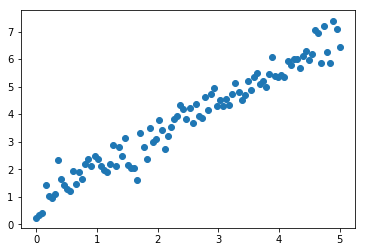

In [16]:
plt.scatter(x,y)

哦, 這看起來是線性的函數 (廢話, 我們自己生的)。現在我們來做線性迴歸。

開始前我們來做一件事, 就是我們喜歡只拿一部份的資料來學習, 叫「訓練資料」, 另外留一部份當「測試資料」。測試資料在「訓練」期電腦是沒看過的, 所以我們可以「考他」。

要把我們完整資料分測試、訓練很簡單, 因為 `SciKit Learn` 自己會幫我們做。指令叫 `train_test_split` (實在有夠白話)。

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9487)

執行之後會回傳回四個 array, 分別是 x 的訓練、測試, y 的訓練測試。所以我們準備用

    x_train, x_test, y_train, y_test

來「接」。接著要放我們原來的 x, y 這很自然, 然後

    test_size=0.2
    
是說我們要留 20% 當測試, 這比例當然是自己可以調的。最後神奇的一步說

    random_state=9487
    
這是確保你之後回來執行這個程式, 隨機取的 80% 訓練資料、20% 測試資料是一樣的 (那個數字你可以自己選)。

為什麼我們要這樣做啊? 原因之一是因為以後我們學得比較多, 有可能第一次沒有訓練得很滿意, 我們想調整我們的「函數學習機」, 再學一次。這時如果是換了訓練資料我們就不太能確定最後學好或學壞, 是因為我們的調整, 還是不同的資料產生的結果。

檢查訓練、測試資料是不是照我們的意思去分 (疑心病幹嘛那麼重)。

In [19]:
len(x_train)

80

In [20]:
len(x_test)

20

再來很重要, 從現在到以後, 很多學函數的方法, 都要求我們訓練資料要排成一列一列的。也就說原本的

$$[x_1, x_2, \ldots, x_{80}]$$

要換成這樣

$$[[x_1], [x_2], \ldots, [x_{80}]]$$

好在我們學過 `reshape`, 這小事...

In [21]:
x_train = x_train.reshape(80,1)

In [22]:
x_test = x_test.reshape(20,1)

接下來就是召喚 `LinearRegression` 學習機了。

In [23]:
from sklearn.linear_model import LinearRegression

從現在的線性迴歸, 到等一下的機器學習, 再到之後的神經網路。我們每一次其實就是先開一台空的「函數學習機」, 現在我們要開一台「迴歸機」。

In [24]:
regr = LinearRegression()

因為線性迴歸實在太簡單, 通常也不太需要調校什麼, 我們就可以直接訓練了。訓練就用 `fit`, 然後把訓練資料餵進去...

In [25]:
regr.fit(x_train, y_train)

/Users/mac/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

然後就學完了!　我們來試用一下。因為我們的學數學習機喜歡一次吃很多資料一起告訴你答案, 所以就算只有一筆也要這樣下指令。

In [26]:
regr.predict([[1.3]])

array([ 2.41448339])

那兩筆就這樣, 更多也沒有什麼問題。

In [27]:
regr.predict([[2.7],[1.5]])

array([ 4.09149375,  2.6540563 ])

我們當然可以餵測試資料進去, 畢竟只有這些我們是有答案、但我們的學習機是還沒學過的。

In [28]:
Y = regr.predict(x_test)

看看成果。

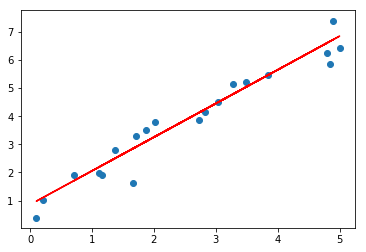

In [29]:
plt.scatter(x_test,y_test)
plt.plot(x_test, Y, 'r')

還不錯對不對 (廢話, 這函數是我們自己創的)。我們接著來用真實的資料來學機器學習, 這樣可能比較有 fu。

## 3. SVM 是機器學習小天王

鳶尾花 (Iris)  數據庫是很有名的資料, 就是試著以一朵鳶尾花花萼、花瓣的大小來分出是哪個的大小來分出是哪個亞種的鳶尾花。

`SciKit Learn` 居然很貼心的幫我們準備好資料...

In [32]:
from sklearn.datasets import load_iris

In [33]:
iris = load_iris()

這是準備好到過份的資料庫, 我們自己在做的時候不會有這種待遇, 好好珍惜這美好時光。

例如我們不知到資料中用了哪些 features, 是什麼意思, 可以看一下。

In [52]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

讀入我們的歷史資料。

In [34]:
X = iris.data
Y = iris.target

來看看有多少筆鳶尾花資料。

In [35]:
len(X)

150

看一下一筆資料有什麼。

In [36]:
X[0]

array([ 5.1,  3.5,  1.4,  0.2])

之前說過, 這是一朵鳶尾花花萼長度、花萼寬度、花瓣長度、花瓣寬度。

然後我們也可以看「答案」的內容。

In [38]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

就是 3 個數字, 每個數字代表一個亞種。

我們自認自己很強, 覺得不用那麼多 features, 決定只要用花瓣資料學習 (其實是為了畫圖方便)。

In [39]:
X = X[:,2:]

於是我們的鳶尾花只有兩個 features 了, 記得第一個 features 可以用 `X[:,0]` 列出來, 第二個可以用 `X[:,1]`。每筆資料對應 0, 1, 2 其中一數字, 放在 `Y` 裡面。於是我們把顏色令成 `c=Y`, 神奇的事就發生了!

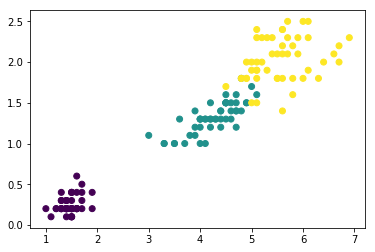

In [40]:
plt.scatter(X[:,0], X[:,1], c=Y)

`matplotlib` 居然貼心的幫我們選了 3 個顏色, 標記我們的資料是哪個亞種的。

現在我們要像之前把我們有的資料分訓練資料和測試資料。

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=9487)

我們來看訓練資料, 再複習一下畫法。

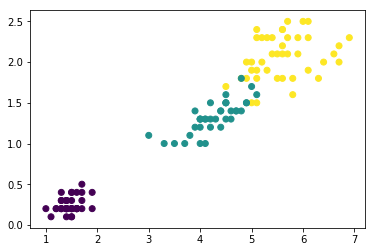

In [42]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

可愛的 SVM 學機習要來了, 這次我們要做分類, 用的是 SVC。

In [43]:
from sklearn.svm import SVC

和之前一樣, 就先打開一台「SVC 函數學習機」。

In [44]:
clf = SVC()

其實我們有東西可以 (應該) 調的, 不過我們初學, 就給他亂亂學試試。

In [45]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

來用測試資料考考我們的 SVC 函數機。

In [46]:
y_predict = clf.predict(x_test)

這時因為如果答對了, 我們和正確答案相減就是 0。學得不錯就會大部份是 0, 錯的不是 0 畫出來就會不同色。我們來試試看。

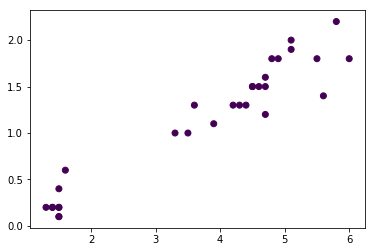

In [47]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_predict-y_test)

100% 正確耶!! 我們檢查一下是不是真的...

In [48]:
y_predict-y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

果然是真的。我們來看看我們成果。

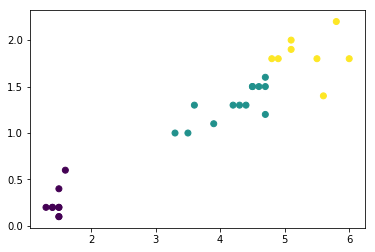

In [49]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_predict)

### 【秘技】分列 X, Y 的變成點座標

等一下我們會大量的把資料變換形式, 現在我們先熱身。在畫圖時常常用到把 x, y 座標分列。現在我們要合成點要怎麼做呢? 也就是說

    X1 <-- [1,2,3,4]
    Y1 <-- [5,6,7,8]
    
希望變成

    [[1,5], [2,6], [3,7], [4,8]]

In [53]:
X1 = np.array([1,2,3,4])
Y1 = np.array([5,6,7,8])

`NumPy` 有個神奇的方式會幫我們做!

In [52]:
np.c_[X1, Y1]

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

### 【重要插播】meshgrid 用法

為了用 `contourf` (填充型的等高線) 呈現我們成果, 我們要介紹一個初學有點難理解、meshgrid 的概念。

`meshgrid` 是產生格點的方式, 通常是我們要畫 3D 曲面啦、或是等高線的時候要先為我們在 xy 平面上「佈點」, 然後算出每點的高度 Z。

我們要做的是給定 x 方向座標, y 方向座標, 然後就產生格點, 如圖示。

![meshgrid](images/meshgrid.png)


於是我們再度用我們的 `X1, Y1` 示範。

In [56]:
X1 = np.array([1,2,3,4])
Y1 = np.array([5,6,7,8])

因為 `matplotlib` 很愛 x, y-座標分開, 經 `meshgrid` 後也是分開的! 所以我們用 Xm 和 Ym 來接。

In [57]:
Xm, Ym = np.meshgrid(X1,Y1)

看一下內容...

In [58]:
Xm

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

等等, 這什麼啊? 原來 `meshgrid` 存網格的 x 座標是一列一列存的。如圖所示。

![meshgrid X 座標](images/meshgridx.png)

同理我們可以理解 Ym 的內容為什麼是這樣了...

In [59]:
Ym

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

![meshgrid Y 座標](images/meshgridy.png)

#### 回到正題, 我們要呈現我們鳶尾花學習成果

現在我們做的是讓平面上密密麻麻的點都去看它會是哪種鳶尾花的數據。

In [54]:
x1, y1 = np.meshgrid(np.arange(0,7,0.02), np.arange(0,3,0.02))

記得 `x1, y1` 是什麼樣子的, 我們要拉平之後 (`x1_ravel(), y1_ravel()`), 再用 `np.c_` 合成一點一點的, 才可以送進去預測。

In [60]:
Z = clf.predict(np.c_[x1.ravel(), y1.ravel()])

好奇的話可以看看我們到底送了多少點進去?

In [61]:
len(x1.ravel())

52500

等一下我們要用 `contourf` 做填充型的等高線, 每一點的「高度」就是我們的 SVC 學習機判斷鳶尾花的亞種。但用 `contourf` 輸入的格點是前面 `meshgrid` 後的 `x1, y1`, 而高度 `Z` 也是要用同樣的型式。

In [62]:
Z = Z.reshape(x1.shape)

於是我們終於可以畫圖了...

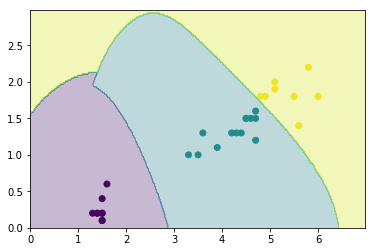

In [63]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_test)
plt.contourf(x1,y1,Z,alpha=0.3)

這是測試資料, 之前我們已經知道我們全對!

不如就來看看所有鳶尾花資料我們 SVC 的表現。

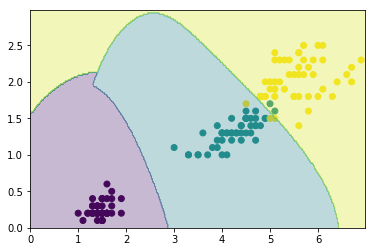

In [64]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.contourf(x1,y1,Z,alpha=0.3)

## 4. K-Means 是神奇的自動分類機

我們來學一個「非監督式」的學習, 也就是我們沒有「標準答案」, 但要讓機器做出來。比如說我們有一堆資料, 不知怎麼分類, 現在我們想叫電腦去分, 只告訴他要分幾類...

然後 1, 2, 3! 就神奇的分好了!

In [65]:
x = np.random.randn(100, 2)

看一下我們的資料。

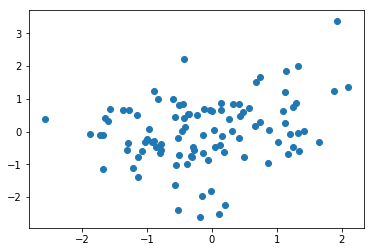

In [67]:
plt.scatter(x[:,0],x[:,1])

到現在我們有點熟了, 就是要把 KMeans 函數學習機找來。

In [68]:
from sklearn.cluster import KMeans

然後打開一台「KMeans 函數學習機」。這次我們第一次設參數! 那是因為我們至少要讓 KMeans 學習機知道要分幾類。

In [69]:
clf = KMeans(n_clusters=3)

接著一樣是訓練。注意現在我們沒有標準答案, 所以只有 x 的資料。

In [70]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

分類好的結果 KMeans 會神秘的放在

    clf.labels_

In [71]:
clf.labels_

array([0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0,
       1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2], dtype=int32)

看一眼分類結果。

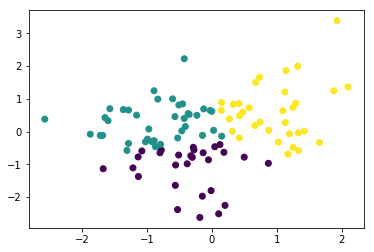

In [72]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_)

看來還不錯! 我們仿之前 SVC 中介紹的畫法, 看 KMeans 到底怎麼分的。

In [73]:
x1, y1 = np.meshgrid(np.arange(-3,3,0.02), np.arange(-4,4,0.02))

In [74]:
Z = clf.predict(np.c_[x1.ravel(), y1.ravel()])

In [75]:
Z = Z.reshape(x1.shape)

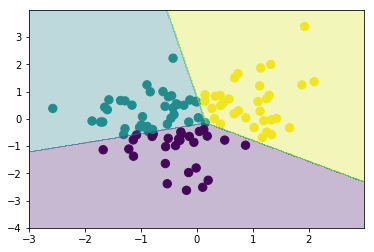

In [76]:
plt.scatter(x[:,0], x[:,1], s=70, c=clf.labels_)
plt.contourf(x1, y1, Z, alpha=0.3)